In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

In [145]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

from scipy import stats

# Step 1: Reading and Understanding the Data

In [146]:
df_bike = pd.read_csv('day.csv')
df_bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [147]:
df_bike.shape

(730, 16)

In [148]:
# There are 730 rows and 16 columns in the data set

In [149]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [150]:
df_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [151]:
# There are no null values present in the data

In [152]:
df_bike[df_bike.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [153]:
# There are no duplicate rows

In [154]:
df_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [155]:
# we can drop instant and dteday columns as these columns seems insignificant

In [156]:
df_bike.drop(['instant','dteday'],axis=1,inplace=True)

In [157]:
(df_bike['casual']+df_bike['registered'])[0:5]

0     985
1     801
2    1349
3    1562
4    1600
dtype: int64

In [158]:
df_bike['cnt'].head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [159]:
# We can see the casual+registered = cnt so we can drop these columns as well

In [160]:
df_bike.drop(['casual','registered'],axis=1,inplace=True)

In [161]:
df_bike.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

In [162]:
# columns seems to be little skewed.

In [163]:
# Spliting the numerical column and categorical

In [164]:
df_bike_num = df_bike.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)
df_bike_cat = df_bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

# Step 2: Visualising the Data

### For Numerical columns

In [165]:
df_bike_num.skew()

temp        -0.057187
atemp       -0.133709
hum         -0.067476
windspeed    0.676314
cnt         -0.049581
dtype: float64

In [166]:
#windspeed columns seems to right little skewed

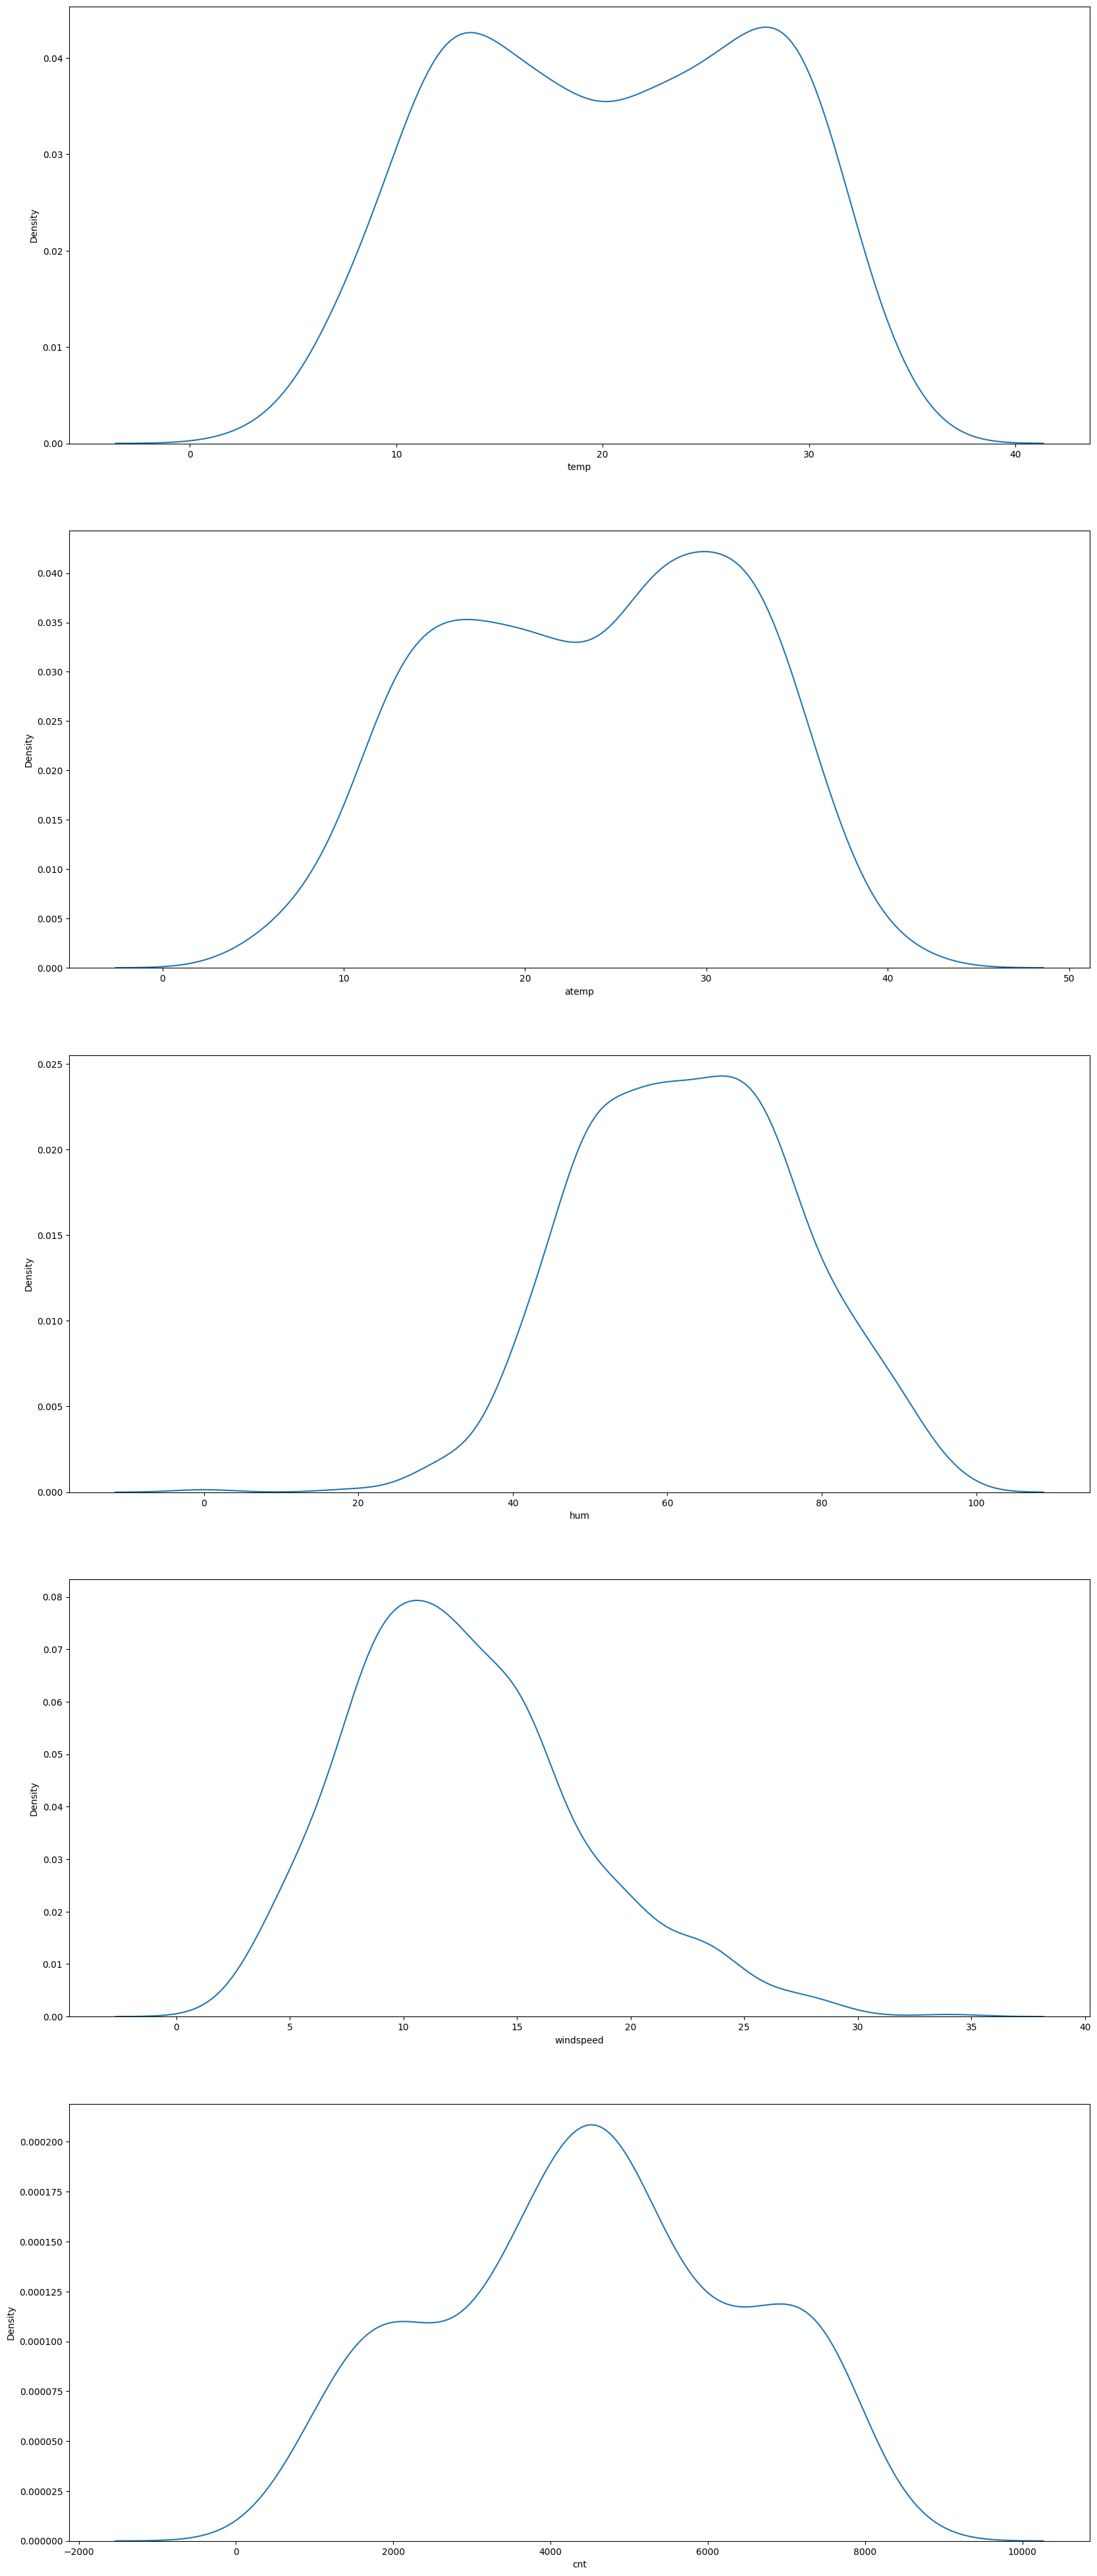

In [167]:
col = df_bike_num.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.kdeplot(df_bike_num[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [168]:
# Outlier detection

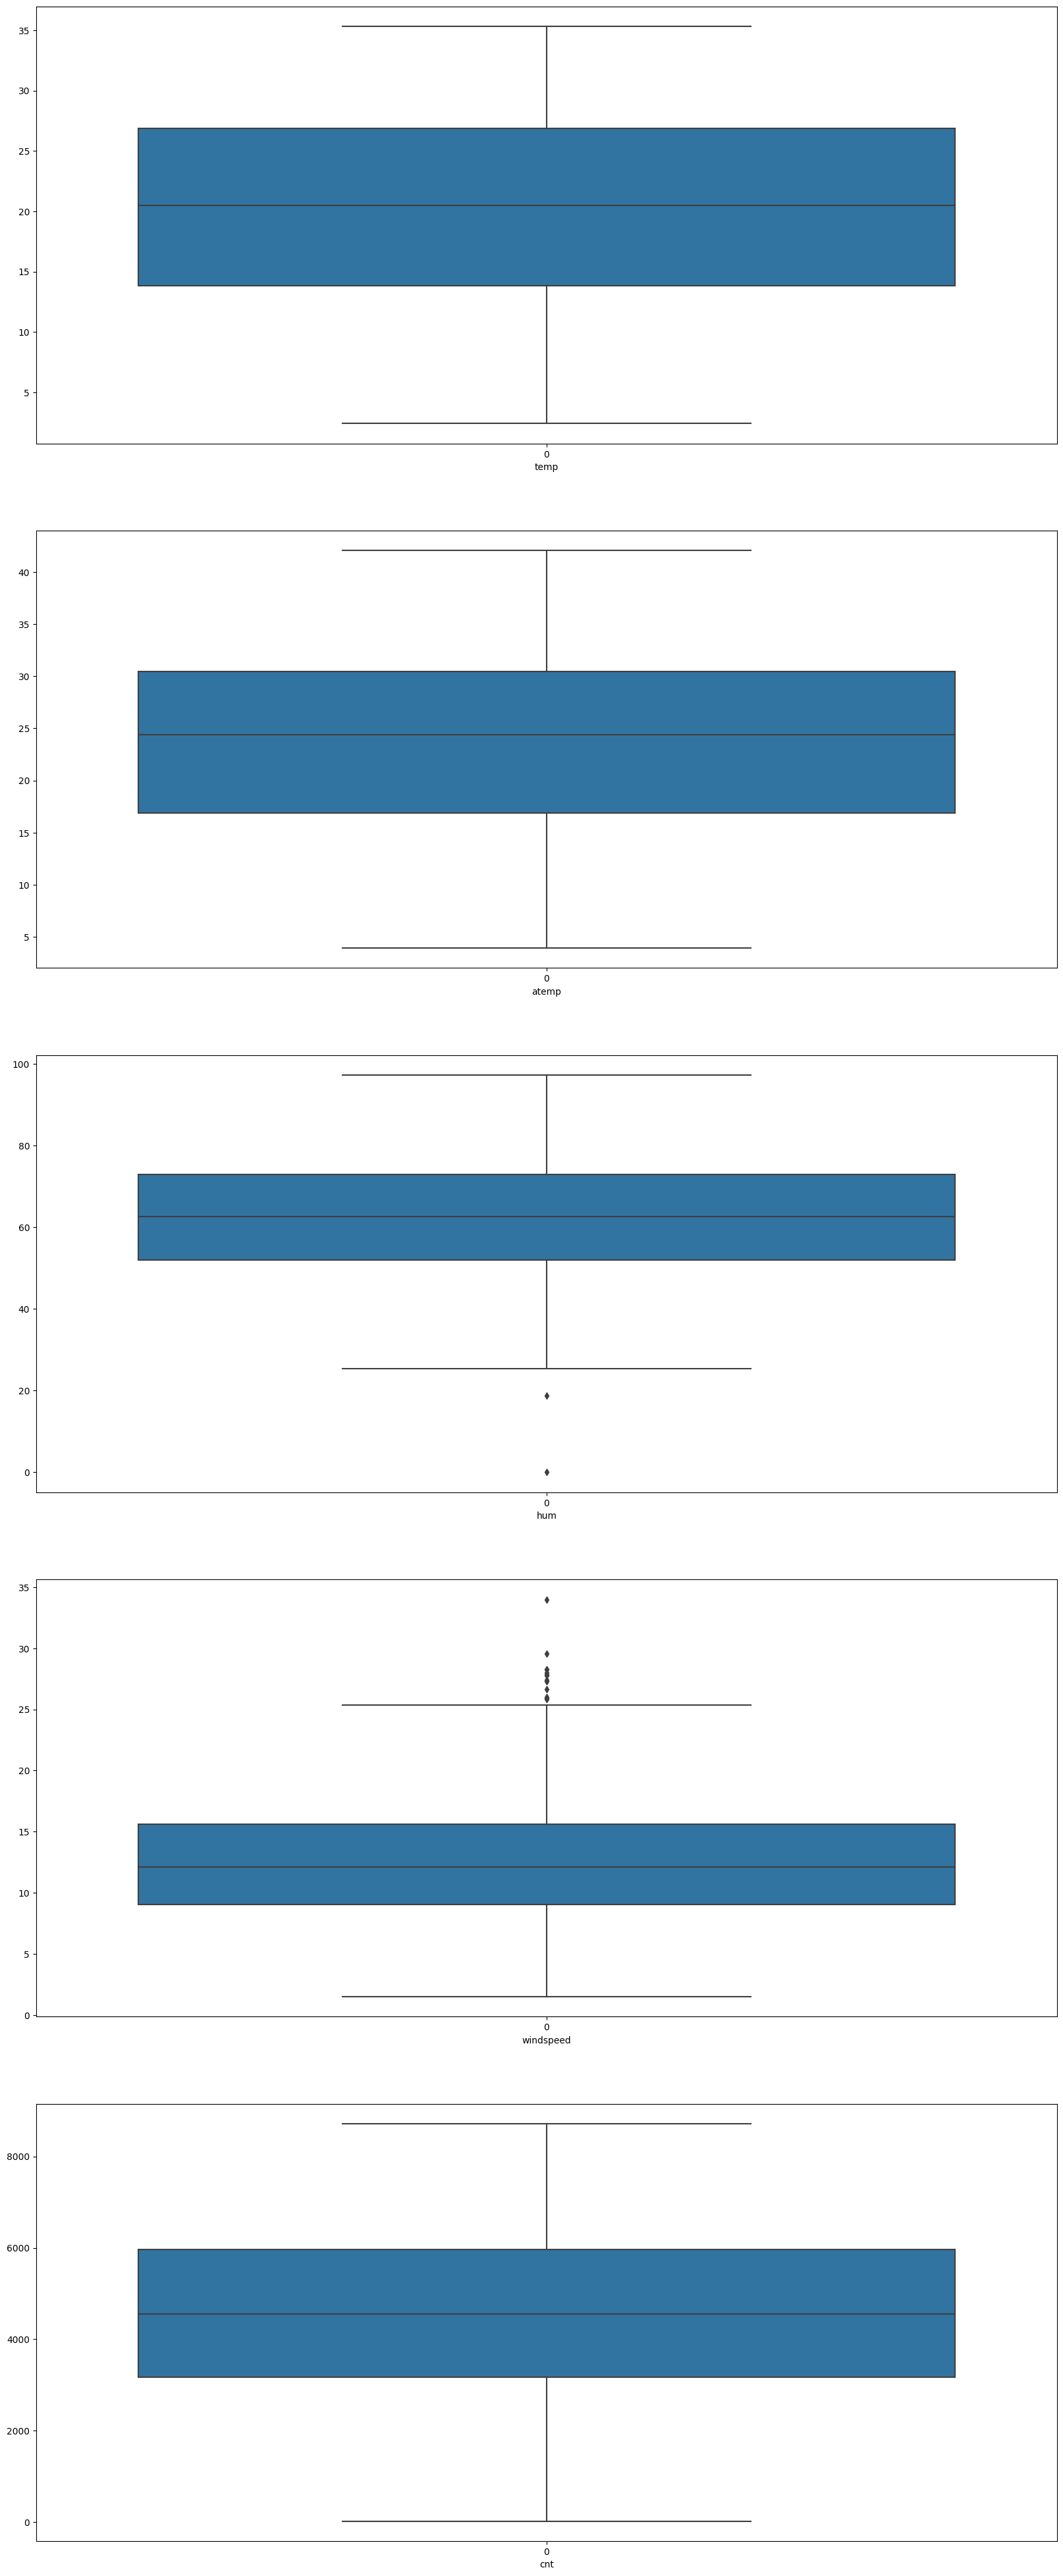

In [169]:
col = df_bike_num.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.boxplot(df_bike_num[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [170]:
# There very less outliers present in the dataset for columns for windspeed and hum so we can ignore them as of now.

### for categorical column

In [171]:
# changing the numerical label into categorical string as these label does not make sense

In [172]:
df_bike_cat.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [173]:
for i in df_bike_cat.columns:
    print("**********************************")
    print(i)
    print(df_bike_cat[i].value_counts())

**********************************
season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
**********************************
yr
0    365
1    365
Name: yr, dtype: int64
**********************************
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
**********************************
holiday
0    709
1     21
Name: holiday, dtype: int64
**********************************
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
**********************************
workingday
1    499
0    231
Name: workingday, dtype: int64
**********************************
weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [174]:
df_bike_cat['season'].replace({1:'Spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df_bike_cat['weekday'].replace({0:'sun',1:'mon',2:'tues',3:'wed',4:'thur',5:'fri',6:'sat'},inplace=True)
df_bike_cat['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul'
                            ,8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
df_bike_cat['weathersit'].replace({1:'good',2:'moderate',3:'bad'},inplace=True)

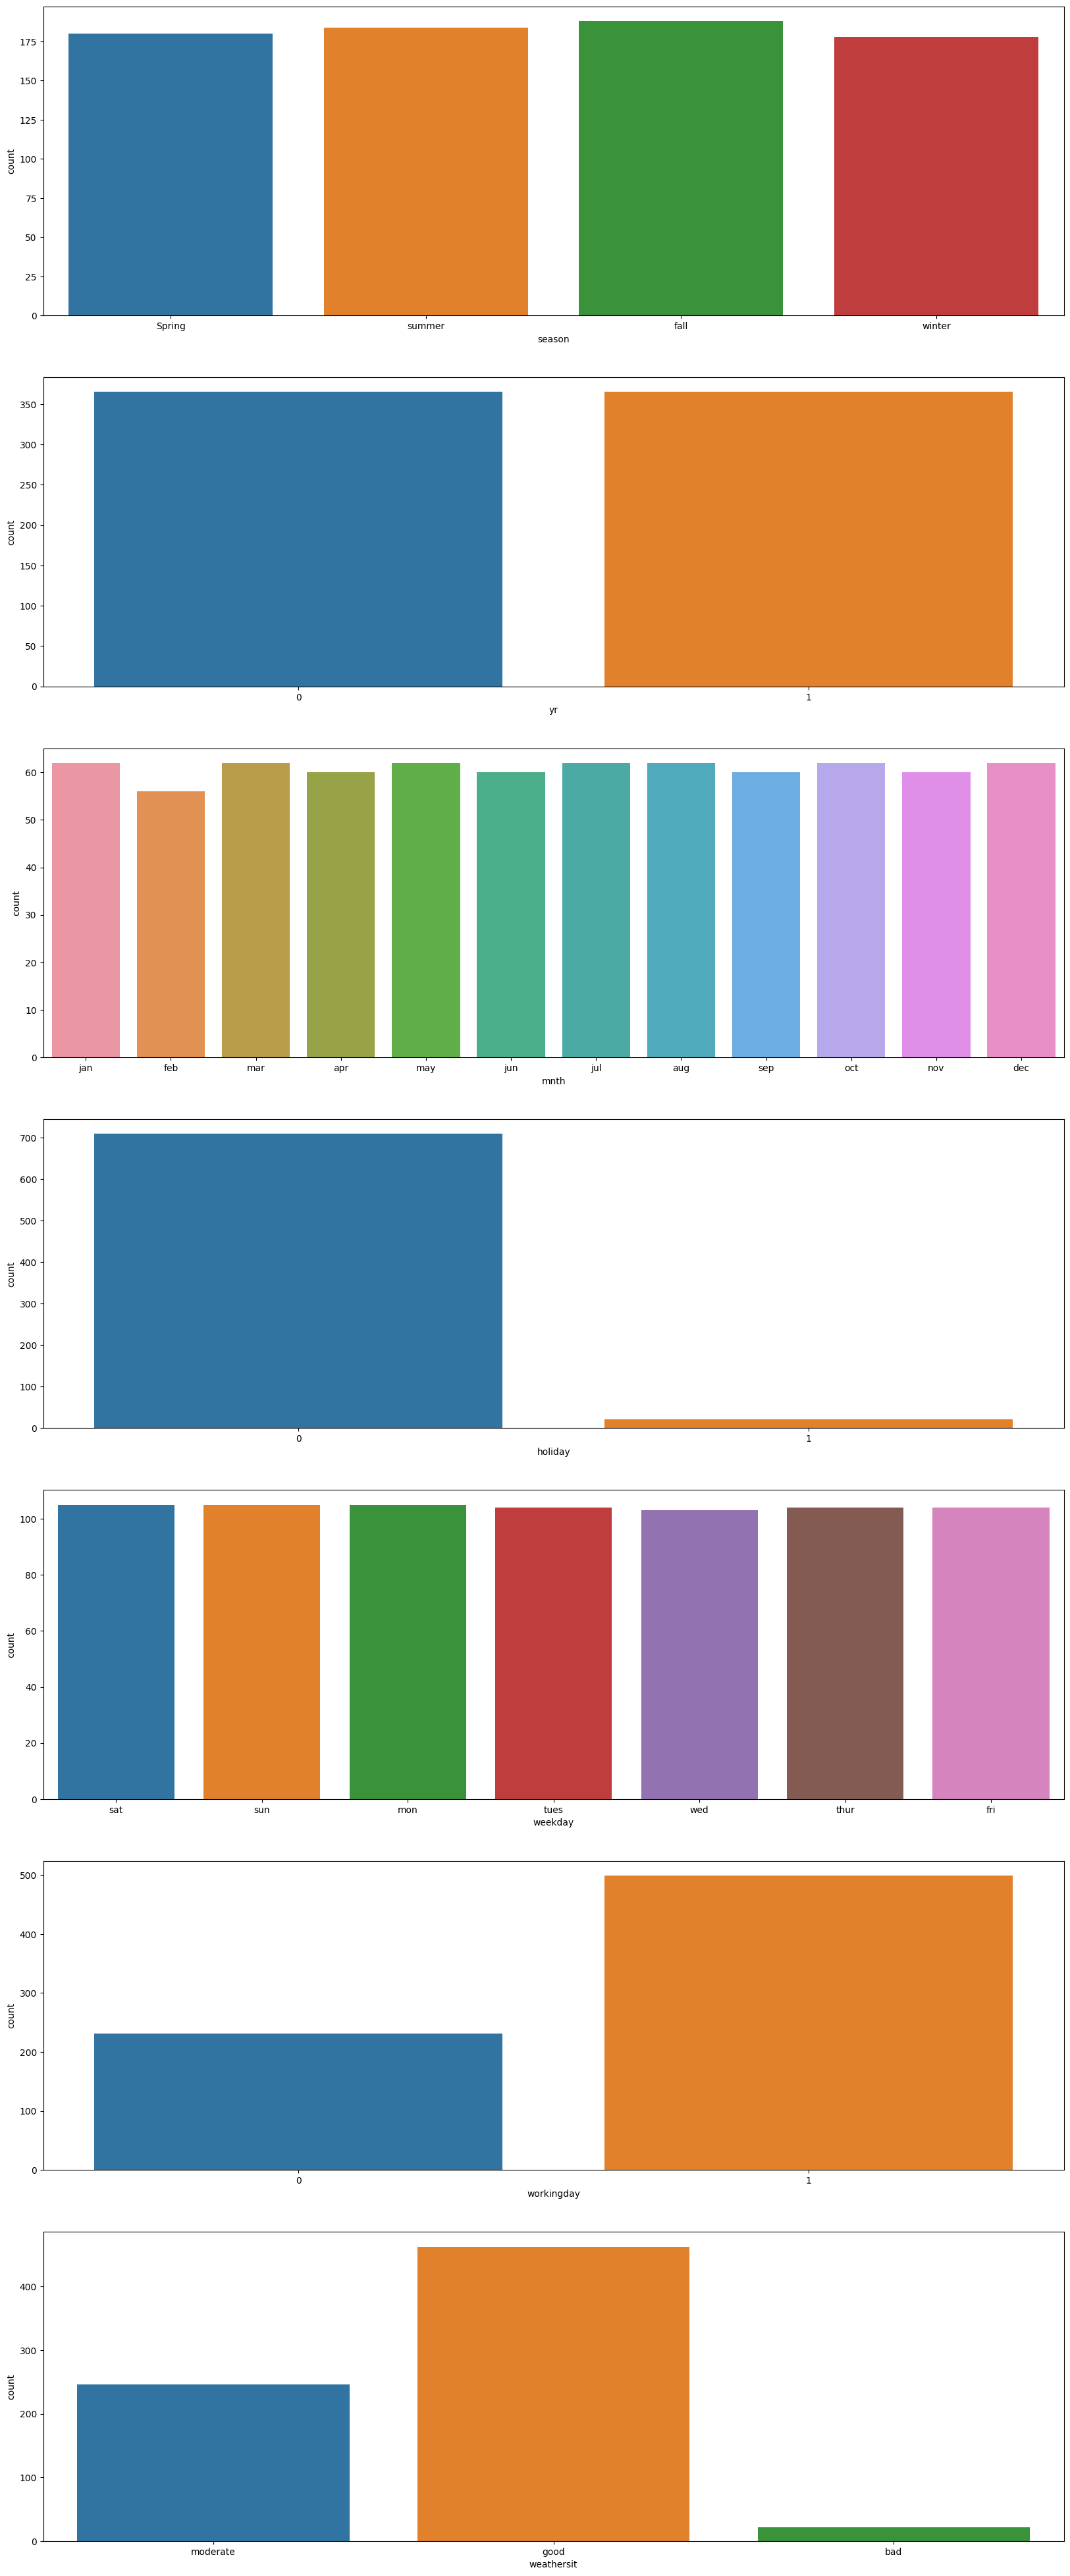

In [175]:
col = df_bike_cat.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.countplot(x = df_bike_cat[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [176]:
# As we can see that there is huge data imbalance for working and holiday columns respectively 
# and it is expected as working day will be more compare to non working day
# Holiday will be very less as compared to non holiday

In [177]:
df_bike_new = pd.concat([df_bike_num,df_bike_cat],axis=1)
df_bike_new.head()

temp     atemp      hum  windspeed   cnt  season  yr mnth  holiday  \
0  14.110847  18.18125  80.5833  10.749882   985  Spring   0  jan        0   
1  14.902598  17.68695  69.6087  16.652113   801  Spring   0  jan        0   
2   8.050924   9.47025  43.7273  16.636703  1349  Spring   0  jan        0   
3   8.200000  10.60610  59.0435  10.739832  1562  Spring   0  jan        0   
4   9.305237  11.46350  43.6957  12.522300  1600  Spring   0  jan        0   

  weekday  workingday weathersit  
0     sat           0   moderate  
1     sun           0   moderate  
2     mon           1       good  
3    tues           1       good  
4     wed           1       good

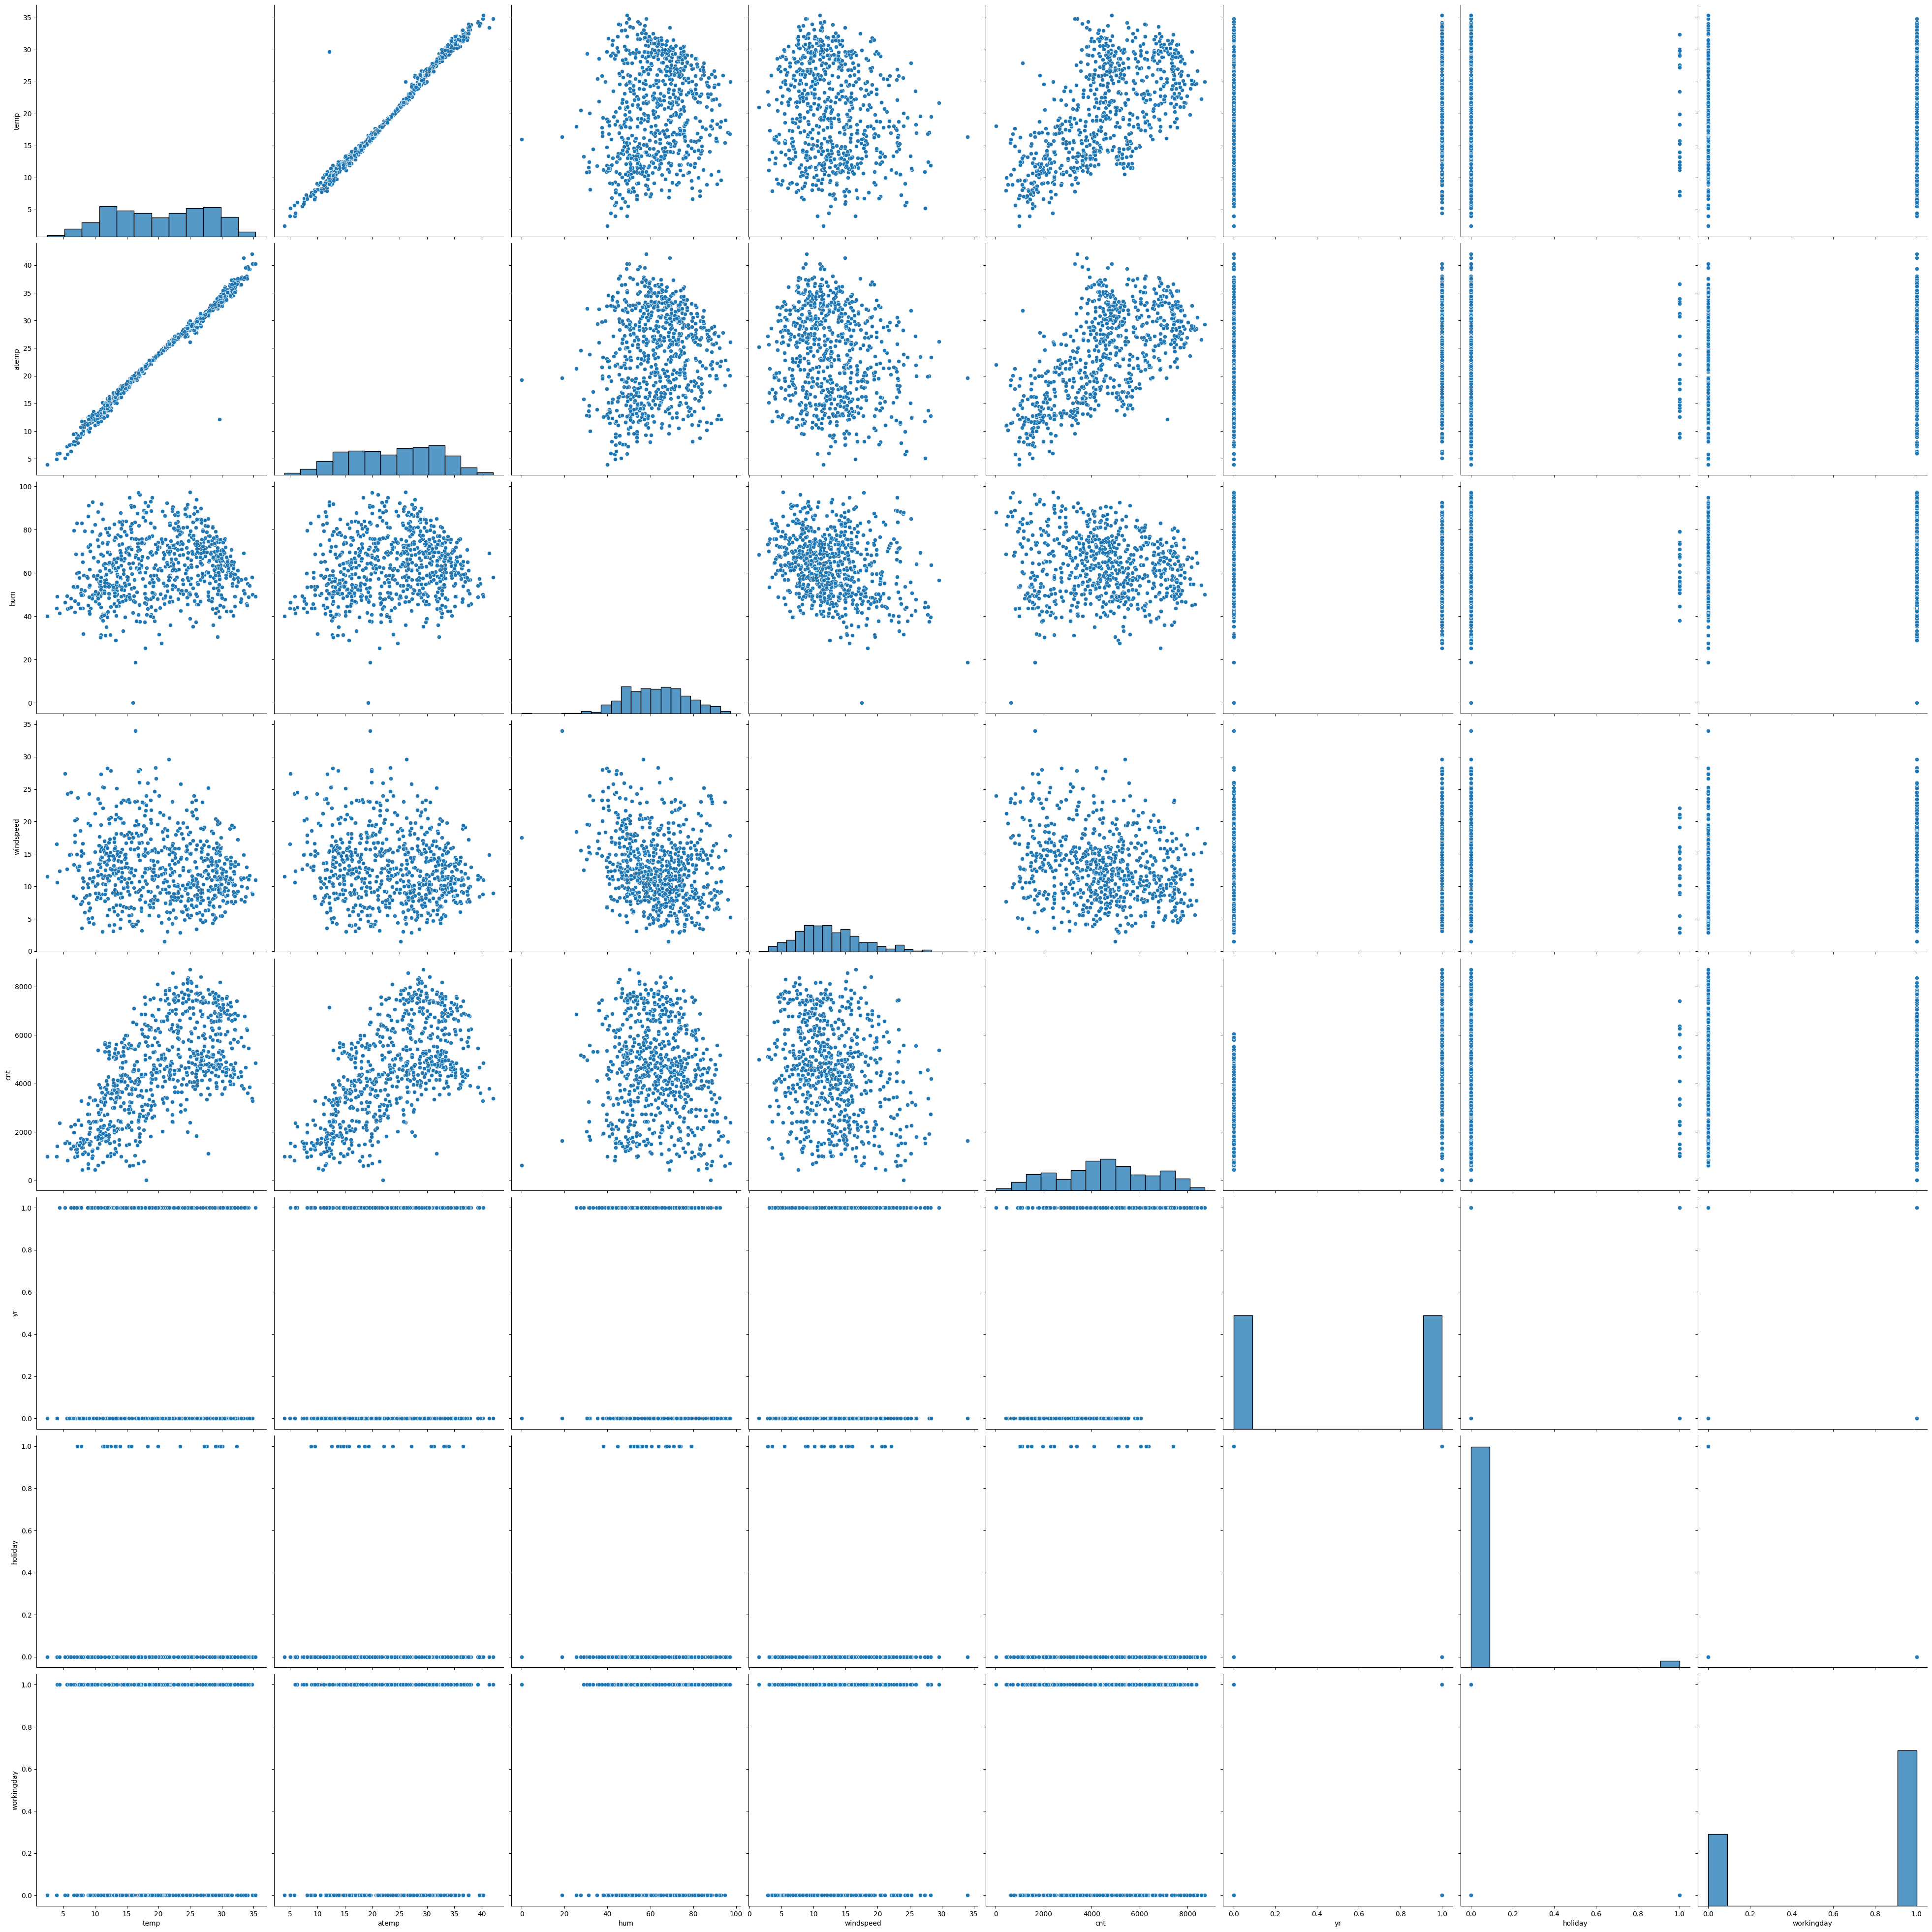

In [178]:
sns.pairplot(df_bike_new,size=5)
plt.show()

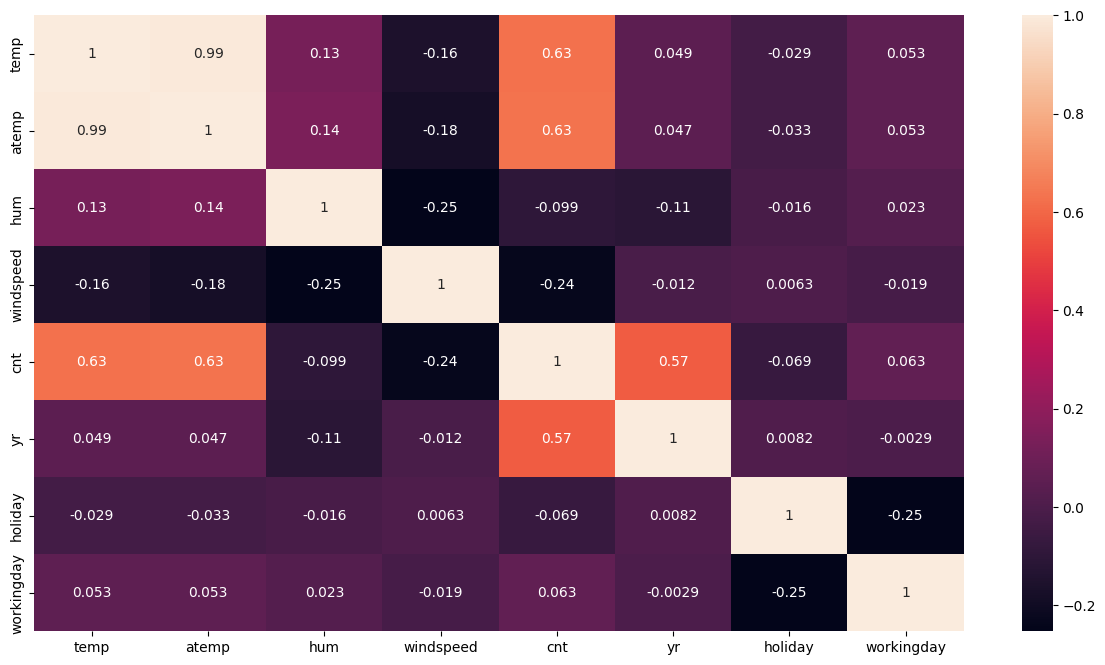

In [179]:
plt.figure(figsize=(15,8))
sns.heatmap(df_bike_new.corr(),annot=True)
plt.show()

In [180]:
# There is strong correlation between atemp and temp
# There is strong correlation between atemp and cnt
# There is strong correlation between temp and cnt

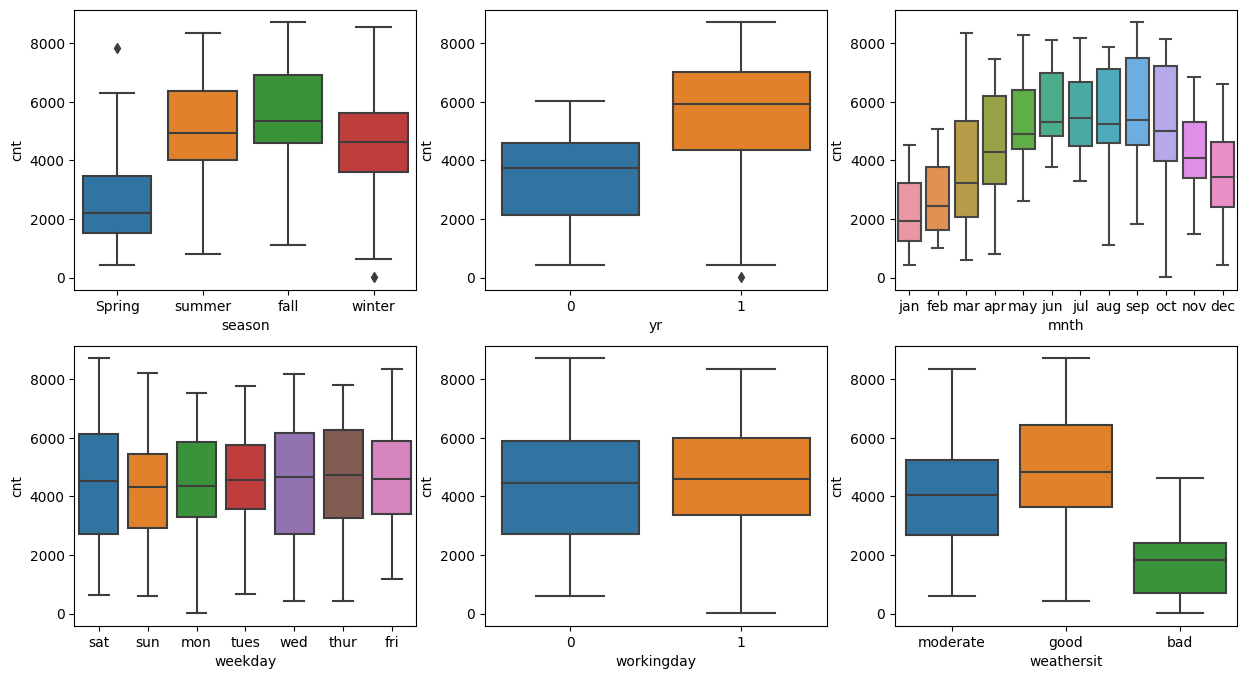

In [181]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(data=df_bike_new,x='season',y='cnt')

plt.subplot(2,3,2)
sns.boxplot(data=df_bike_new,x='yr',y='cnt')

plt.subplot(2,3,3)
sns.boxplot(data=df_bike_new,x='mnth',y='cnt')


plt.subplot(2,3,4)
sns.boxplot(data=df_bike_new,x='weekday',y='cnt')

plt.subplot(2,3,5)
sns.boxplot(data=df_bike_new,x='workingday',y='cnt')

plt.subplot(2,3,6)
sns.boxplot(data=df_bike_new,x='weathersit',y='cnt')

plt.show()

In [182]:
# Average bike booking is more in fall season compare to other season.
# Average bike booking is more in clear weather.
# Average bike booking is more in 2019 as compared to 2018.

# Step 3: Data Preparation

In [183]:
# Convert the categorical into numerical using dummy variable

In [184]:
df_weekday =  pd.get_dummies(data=df_bike_new['weekday'],drop_first=True)
df_mnth =  pd.get_dummies(data=df_bike_new['mnth'],drop_first=True)
df_season =  pd.get_dummies(data=df_bike_new['season'],drop_first=True)
df_weathersit =  pd.get_dummies(data=df_bike_new['weathersit'],drop_first=True)

In [185]:
df_bike_new2 = pd.concat([df_bike_new,df_weekday,df_mnth,df_season,df_weathersit],axis=1)
df_bike_new2.head()

temp     atemp      hum  windspeed   cnt  season  yr mnth  holiday  \
0  14.110847  18.18125  80.5833  10.749882   985  Spring   0  jan        0   
1  14.902598  17.68695  69.6087  16.652113   801  Spring   0  jan        0   
2   8.050924   9.47025  43.7273  16.636703  1349  Spring   0  jan        0   
3   8.200000  10.60610  59.0435  10.739832  1562  Spring   0  jan        0   
4   9.305237  11.46350  43.6957  12.522300  1600  Spring   0  jan        0   

  weekday  ...  mar may  nov  oct  sep  fall  summer  winter  good  moderate  
0     sat  ...    0   0    0    0    0     0       0       0     0         1  
1     sun  ...    0   0    0    0    0     0       0       0     0         1  
2     mon  ...    0   0    0    0    0     0       0       0     1         0  
3    tues  ...    0   0    0    0    0     0       0       0     1         0  
4     wed  ...    0   0    0    0    0     0       0       0     1         0  

[5 rows x 34 columns]

In [186]:
df_bike_new2.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

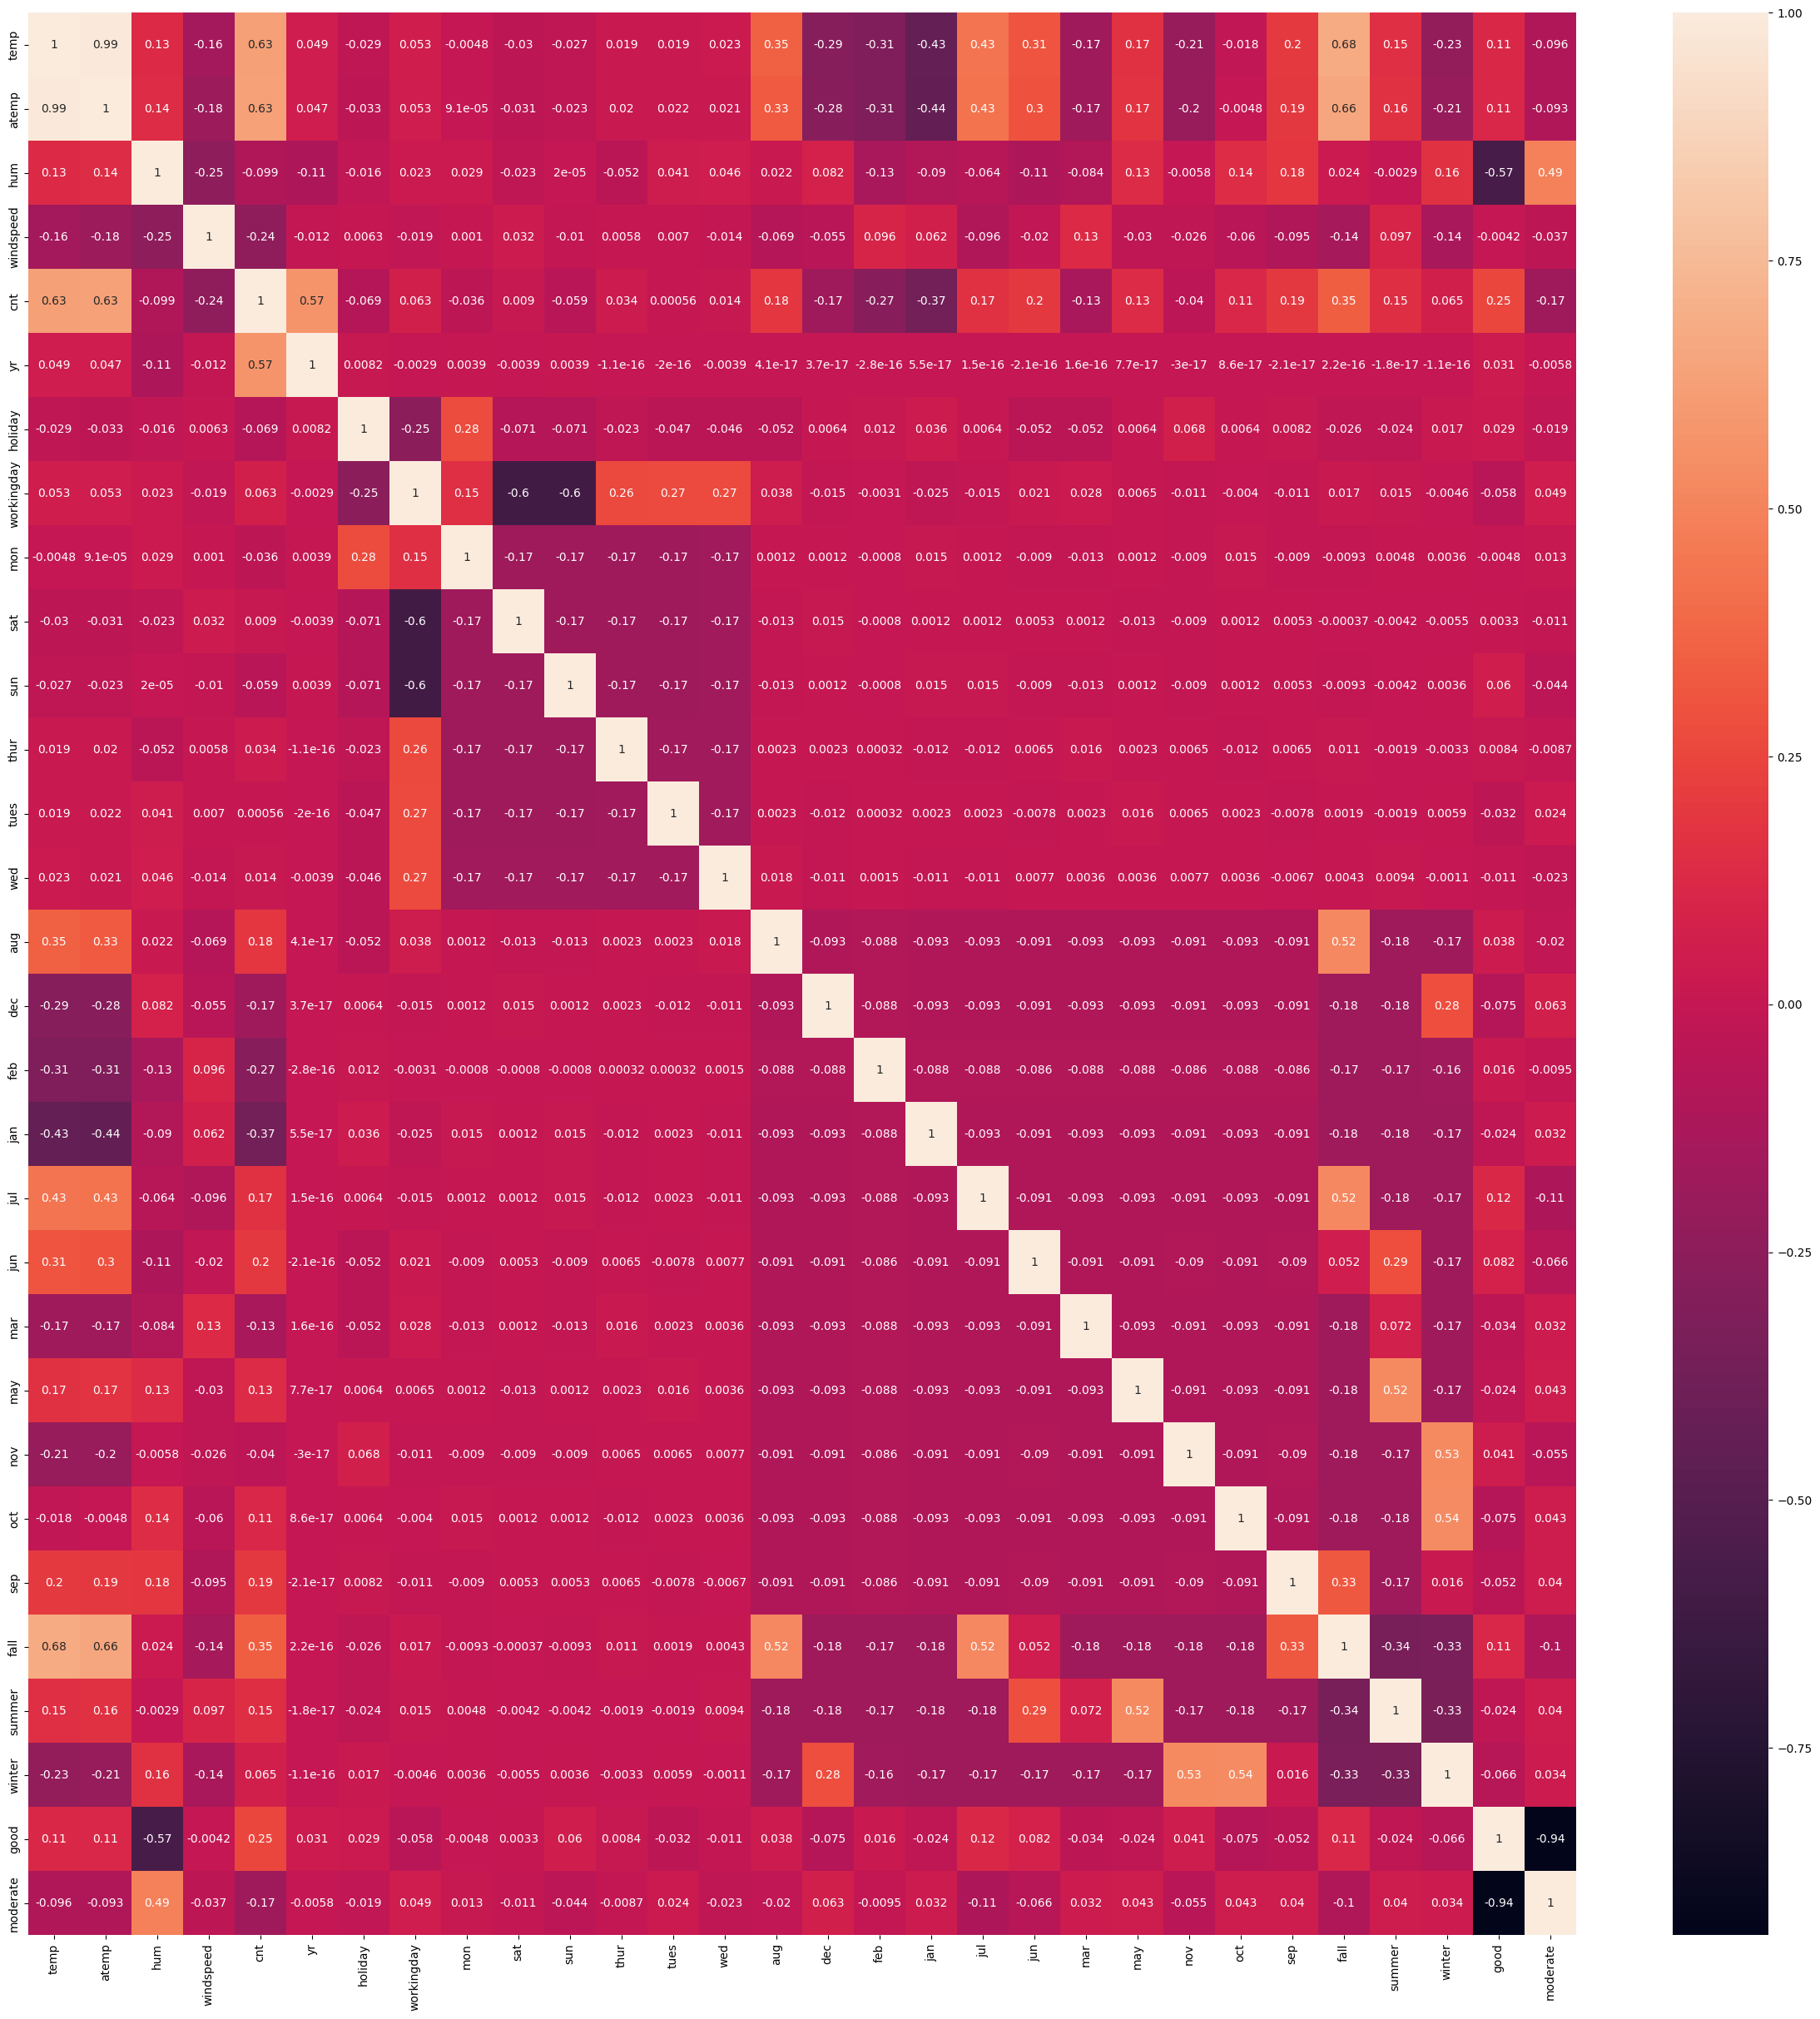

In [187]:
plt.figure(figsize=(30,30))
sns.heatmap(df_bike_new2.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [188]:
# Splitting the dependent variable and idenpendent variable

In [189]:
X = df_bike_new2.drop(['cnt'],axis=1)
y = df_bike_new2['cnt']

# Step 4: Splitting the Data into Training and Testing Sets

In [190]:
# Split in X_train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


### Standardizing the numerical column

In [191]:
col = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

X_train[col] = scaler.fit_transform(X_train[col])
X_train.head()

temp     atemp       hum  windspeed  yr  holiday  workingday  mon  \
24   0.165924  0.182852  0.634403   0.256230   0        0           1    0   
260  0.537125  0.527854  0.714653   0.372381   0        0           0    0   
202  0.982573  1.000000  0.596830   0.264112   0        0           1    0   
317  0.566531  0.573774  0.603684   0.678015   0        0           1    1   
473  0.525144  0.531235  0.629820   0.103866   1        0           1    0   

     sat  sun  ...  mar  may  nov  oct  sep  fall  summer  winter  good  \
24     0    0  ...    0    0    0    0    0     0       0       0     0   
260    0    1  ...    0    0    0    0    1     1       0       0     1   
202    0    0  ...    0    0    0    0    0     1       0       0     1   
317    0    0  ...    0    0    1    0    0     0       0       1     1   
473    0    0  ...    0    0    0    0    0     0       1       0     1   

     moderate  
24          1  
260         0  
202         0  
317         0  
473         0  

[5 rows x 29 columns]

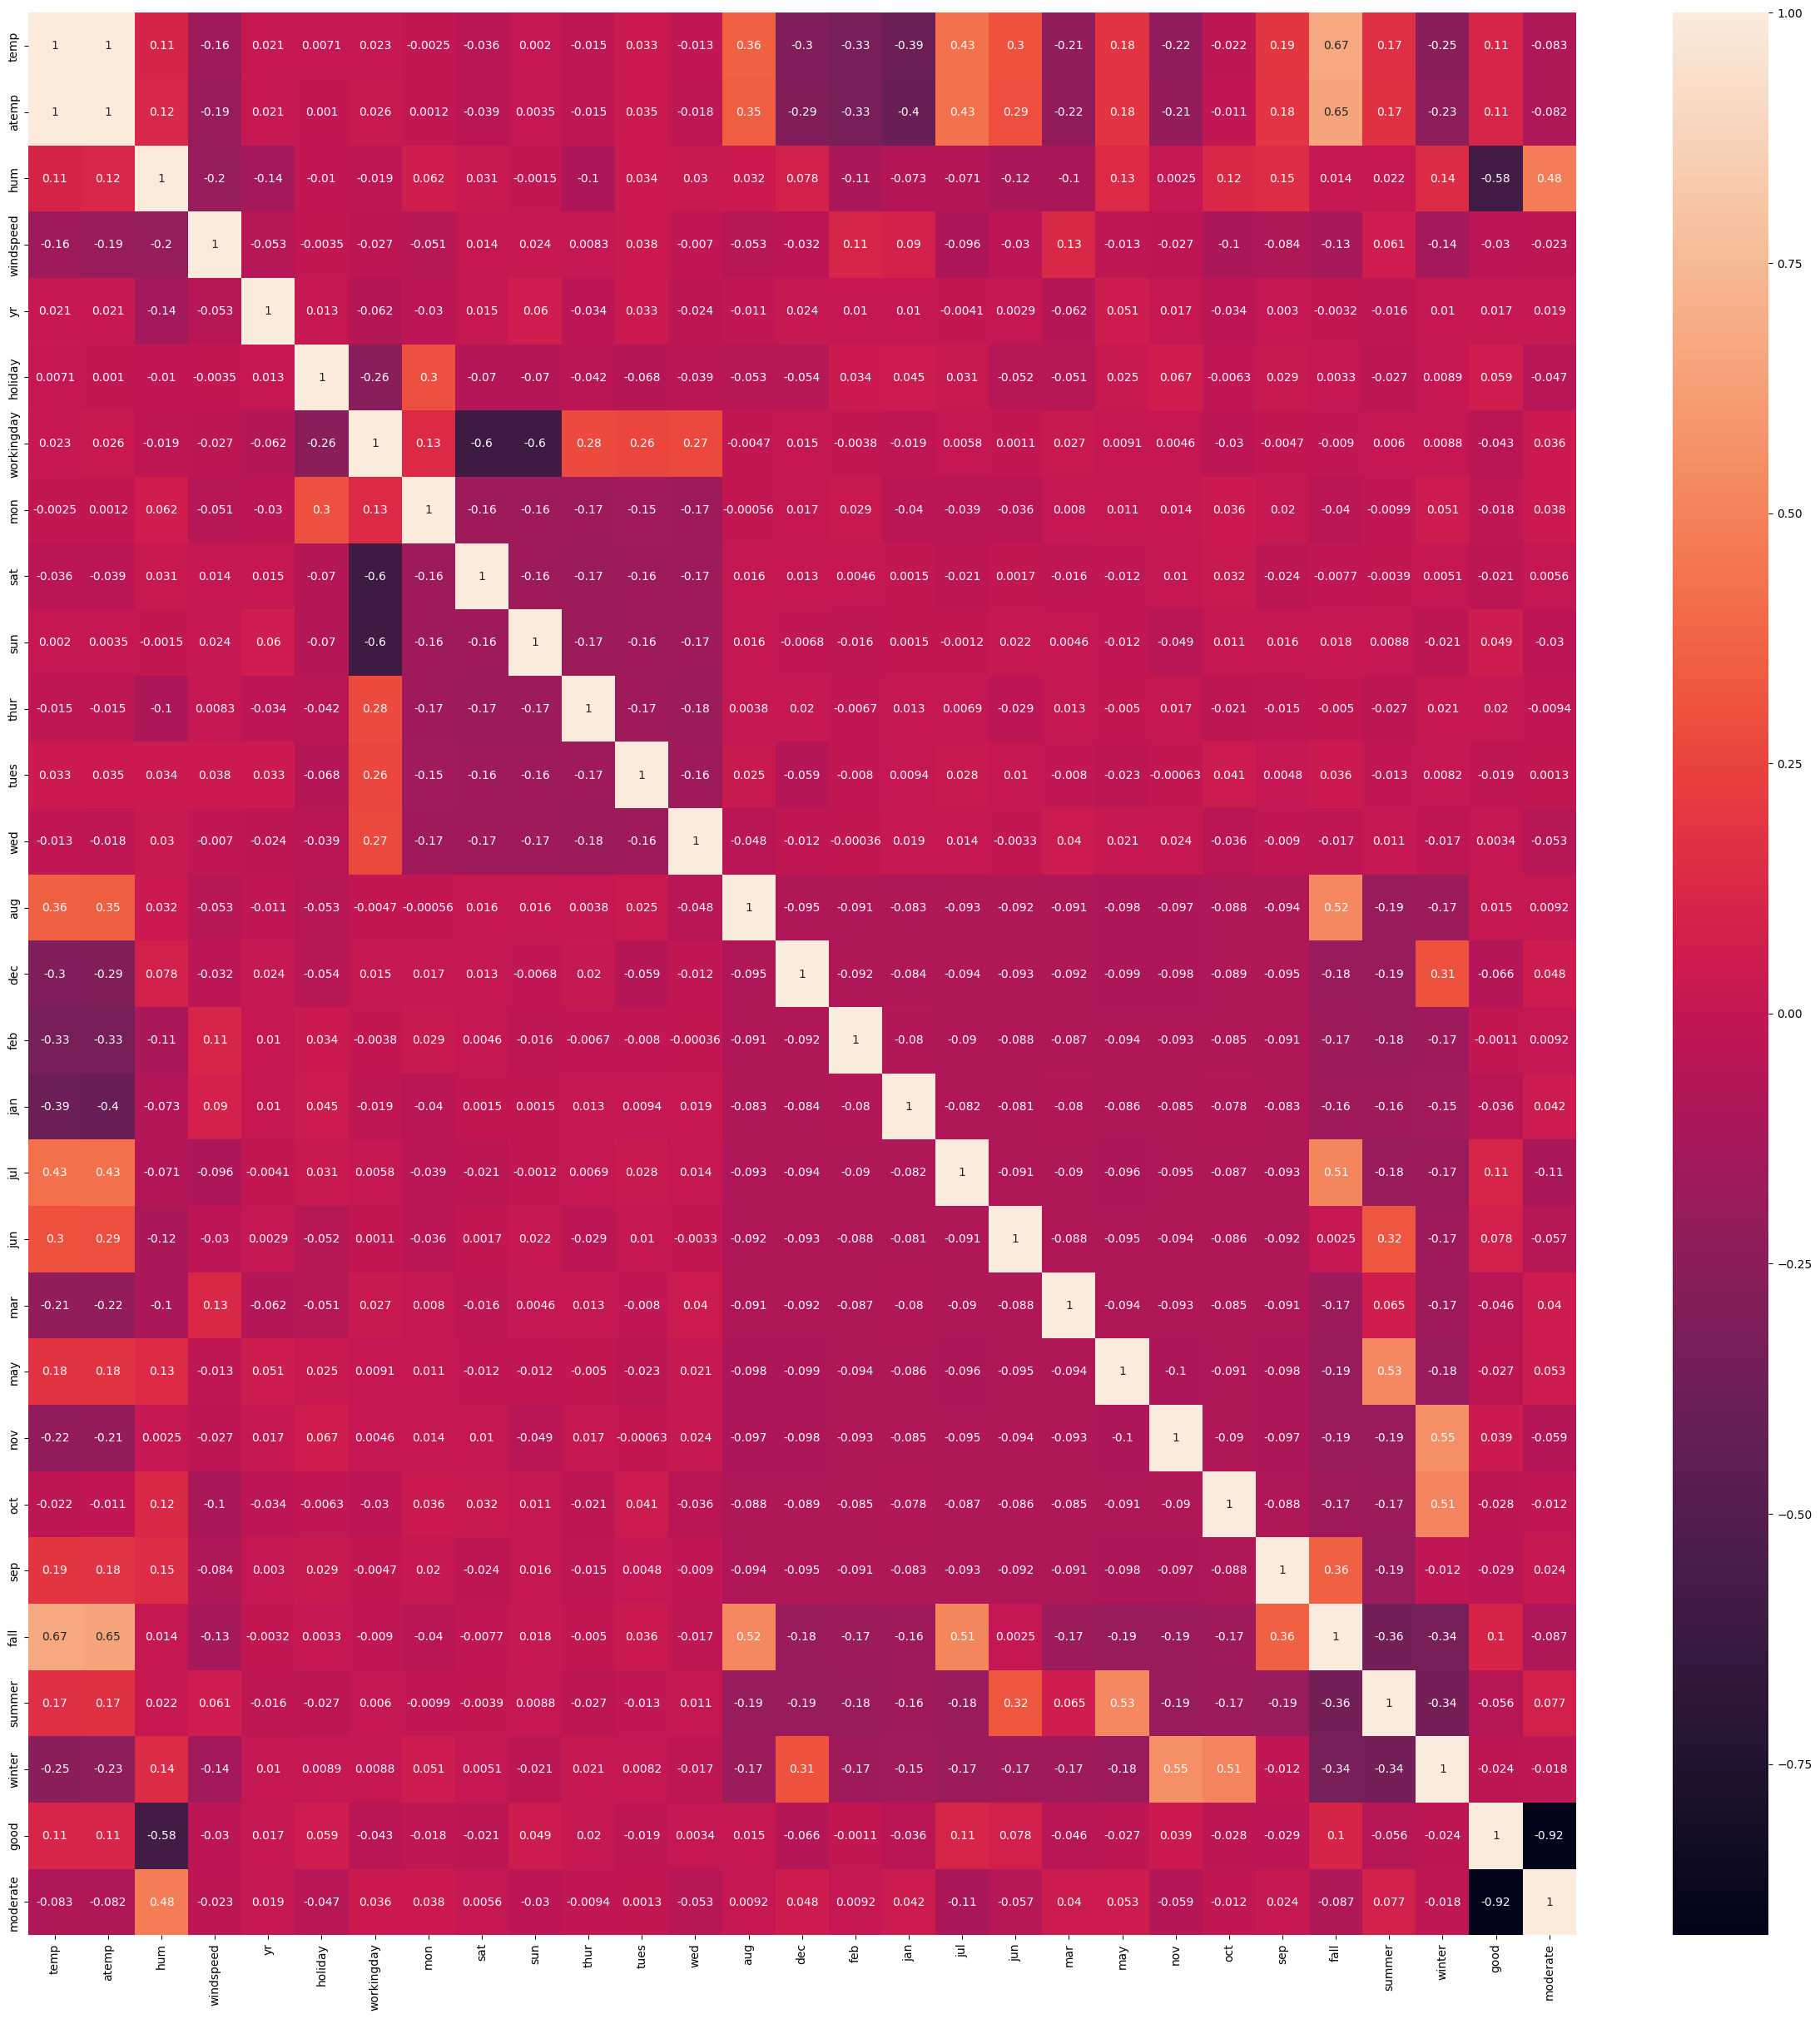

In [192]:
plt.figure(figsize = (30, 30)) 
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [193]:
# There is chance for multicolinearity

In [194]:
# Base model

In [195]:
# Building with RFE

In [196]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(estimator=lr,n_features_to_select=15)

rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thur', False, 15),
 ('tues', False, 12),
 ('wed', False, 14),
 ('aug', False, 11),
 ('dec', False, 6),
 ('feb', False, 13),
 ('jan', False, 7),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', False, 3),
 ('may', False, 2),
 ('nov', False, 5),
 ('oct', True, 1),
 ('sep', True, 1),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [197]:
def build_lr_ols_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

In [198]:
def find_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Columns'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [199]:
signi_list = X_train.columns[rfe.support_].to_list()
signi_list


['temp',
 'atemp',
 'hum',
 'windspeed',
 'yr',
 'workingday',
 'sat',
 'jul',
 'oct',
 'sep',
 'fall',
 'summer',
 'winter',
 'good',
 'moderate']

In [200]:
 X_train.columns[~rfe.support_]

Index(['holiday', 'mon', 'sun', 'thur', 'tues', 'wed', 'aug', 'dec', 'feb',
       'jan', 'jun', 'mar', 'may', 'nov'],
      dtype='object')

# Step 5: Building a linear model

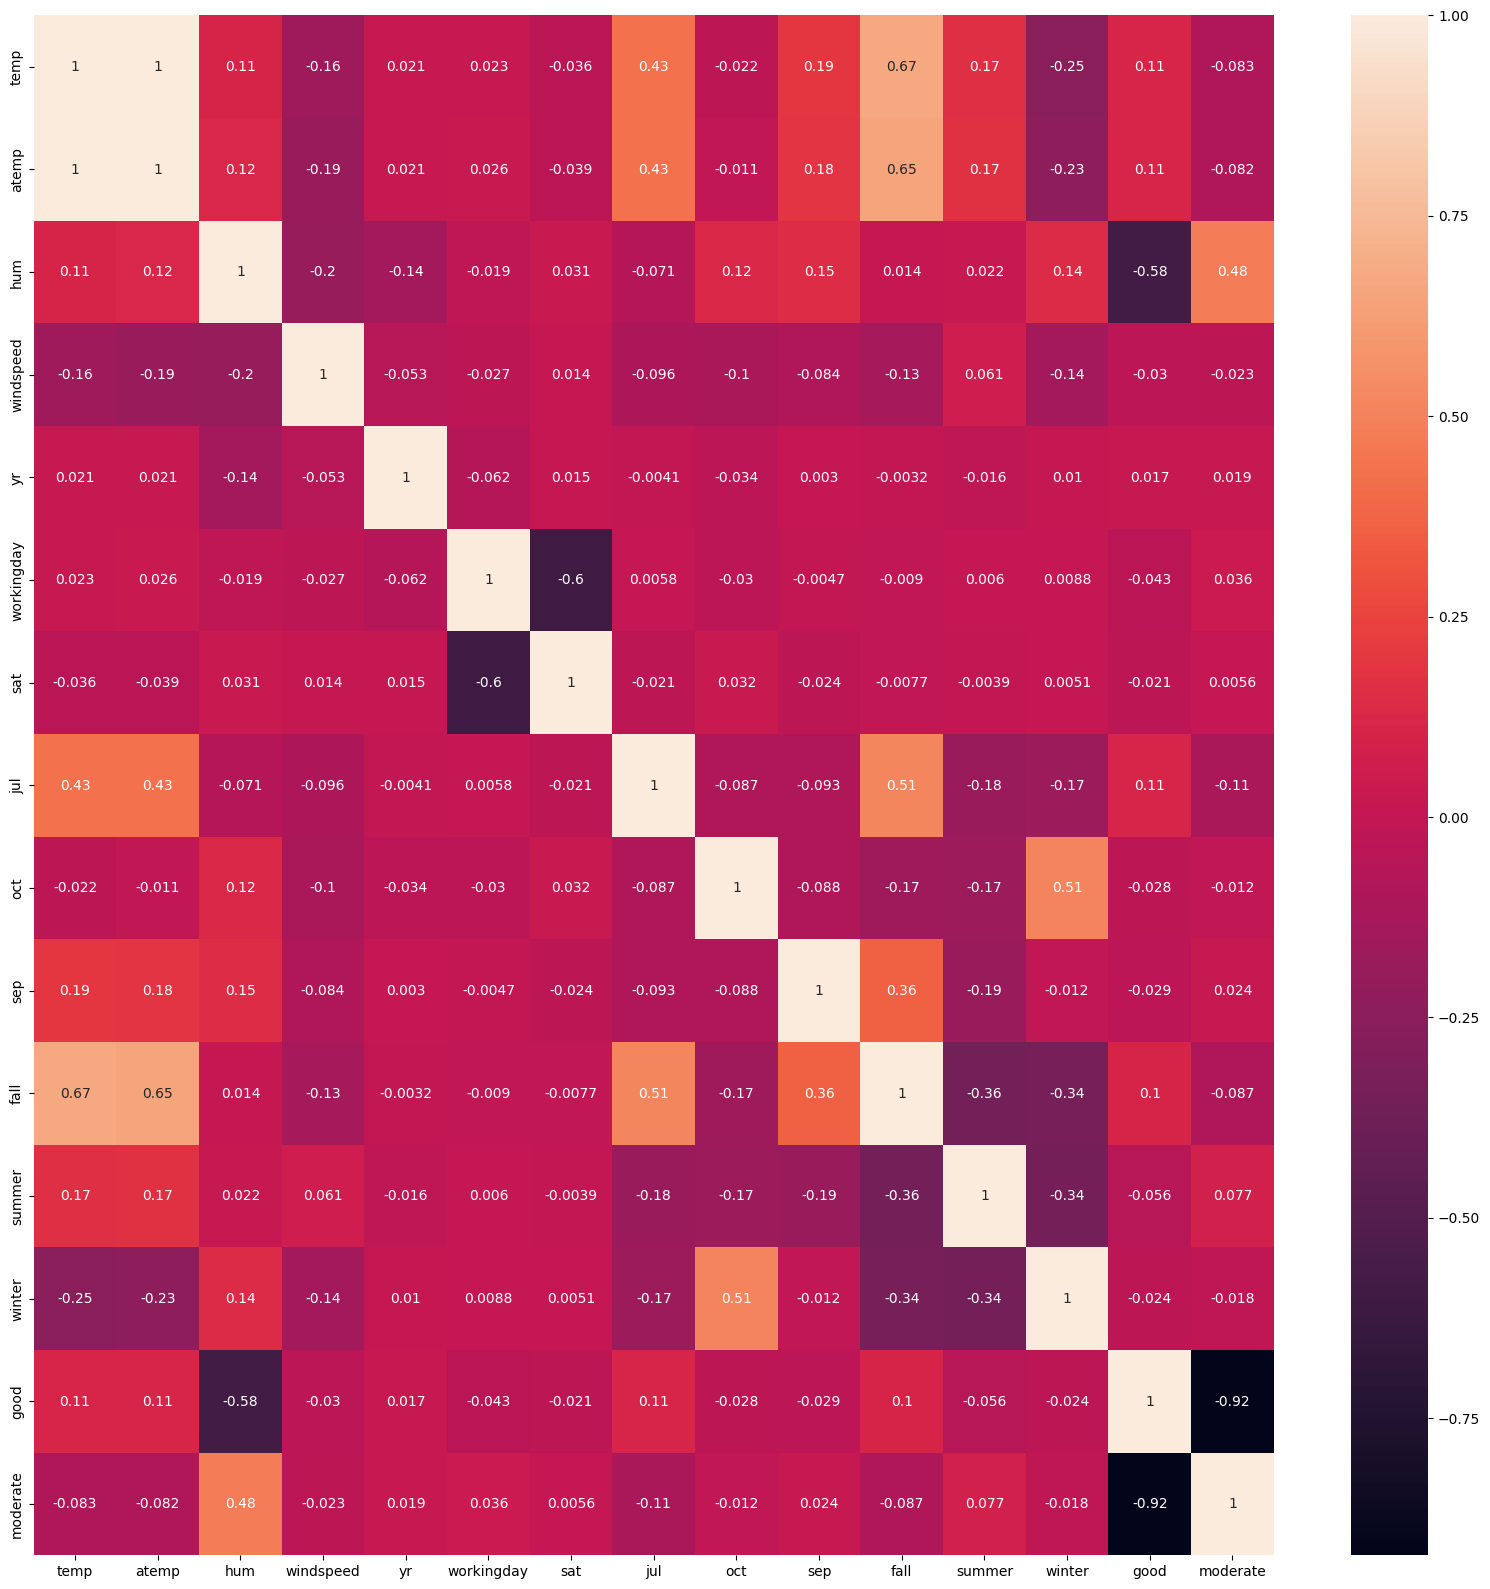

In [201]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[signi_list].corr(),annot=True);

In [202]:
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.40e-184
Time:                        17:10:07   Log-Likelihood:                -4124.2
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.8725    388.307      0.620      0.5

In [203]:
signi_list.remove('atemp')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          2.17e-185
Time:                        17:10:07   Log-Likelihood:                -4125.0
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8343.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.1127    387.399      0.715      0.4

In [204]:
signi_list.remove('hum')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          5.51e-182
Time:                        17:10:07   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1075.5033    260.183     -4.134      0.0

In [205]:
signi_list.remove('jul')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.42e-182
Time:                        17:10:07   Log-Likelihood:                -4137.2
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1075.1047    260.617     -4.125      0.0

In [206]:
signi_list.remove('moderate')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.12e-172
Time:                        17:10:07   Log-Likelihood:                -4163.4
No. Observations:                 511   AIC:                             8351.
Df Residuals:                     499   BIC:                             8402.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        340.4224    184.265      1.847      0.0

In [207]:
signi_list.remove('fall')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.45e-170
Time:                        17:10:07   Log-Likelihood:                -4171.2
No. Observations:                 511   AIC:                             8364.
Df Residuals:                     500   BIC:                             8411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.5762    186.281      1.512      0.1

In [208]:
signi_list.remove('sat')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          9.70e-171
Time:                        17:10:07   Log-Likelihood:                -4173.6
No. Observations:                 511   AIC:                             8367.
Df Residuals:                     501   BIC:                             8410.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        431.0063    173.767      2.480      0.0

In [209]:
signi_list

['temp',
 'windspeed',
 'yr',
 'workingday',
 'oct',
 'sep',
 'summer',
 'winter',
 'good']

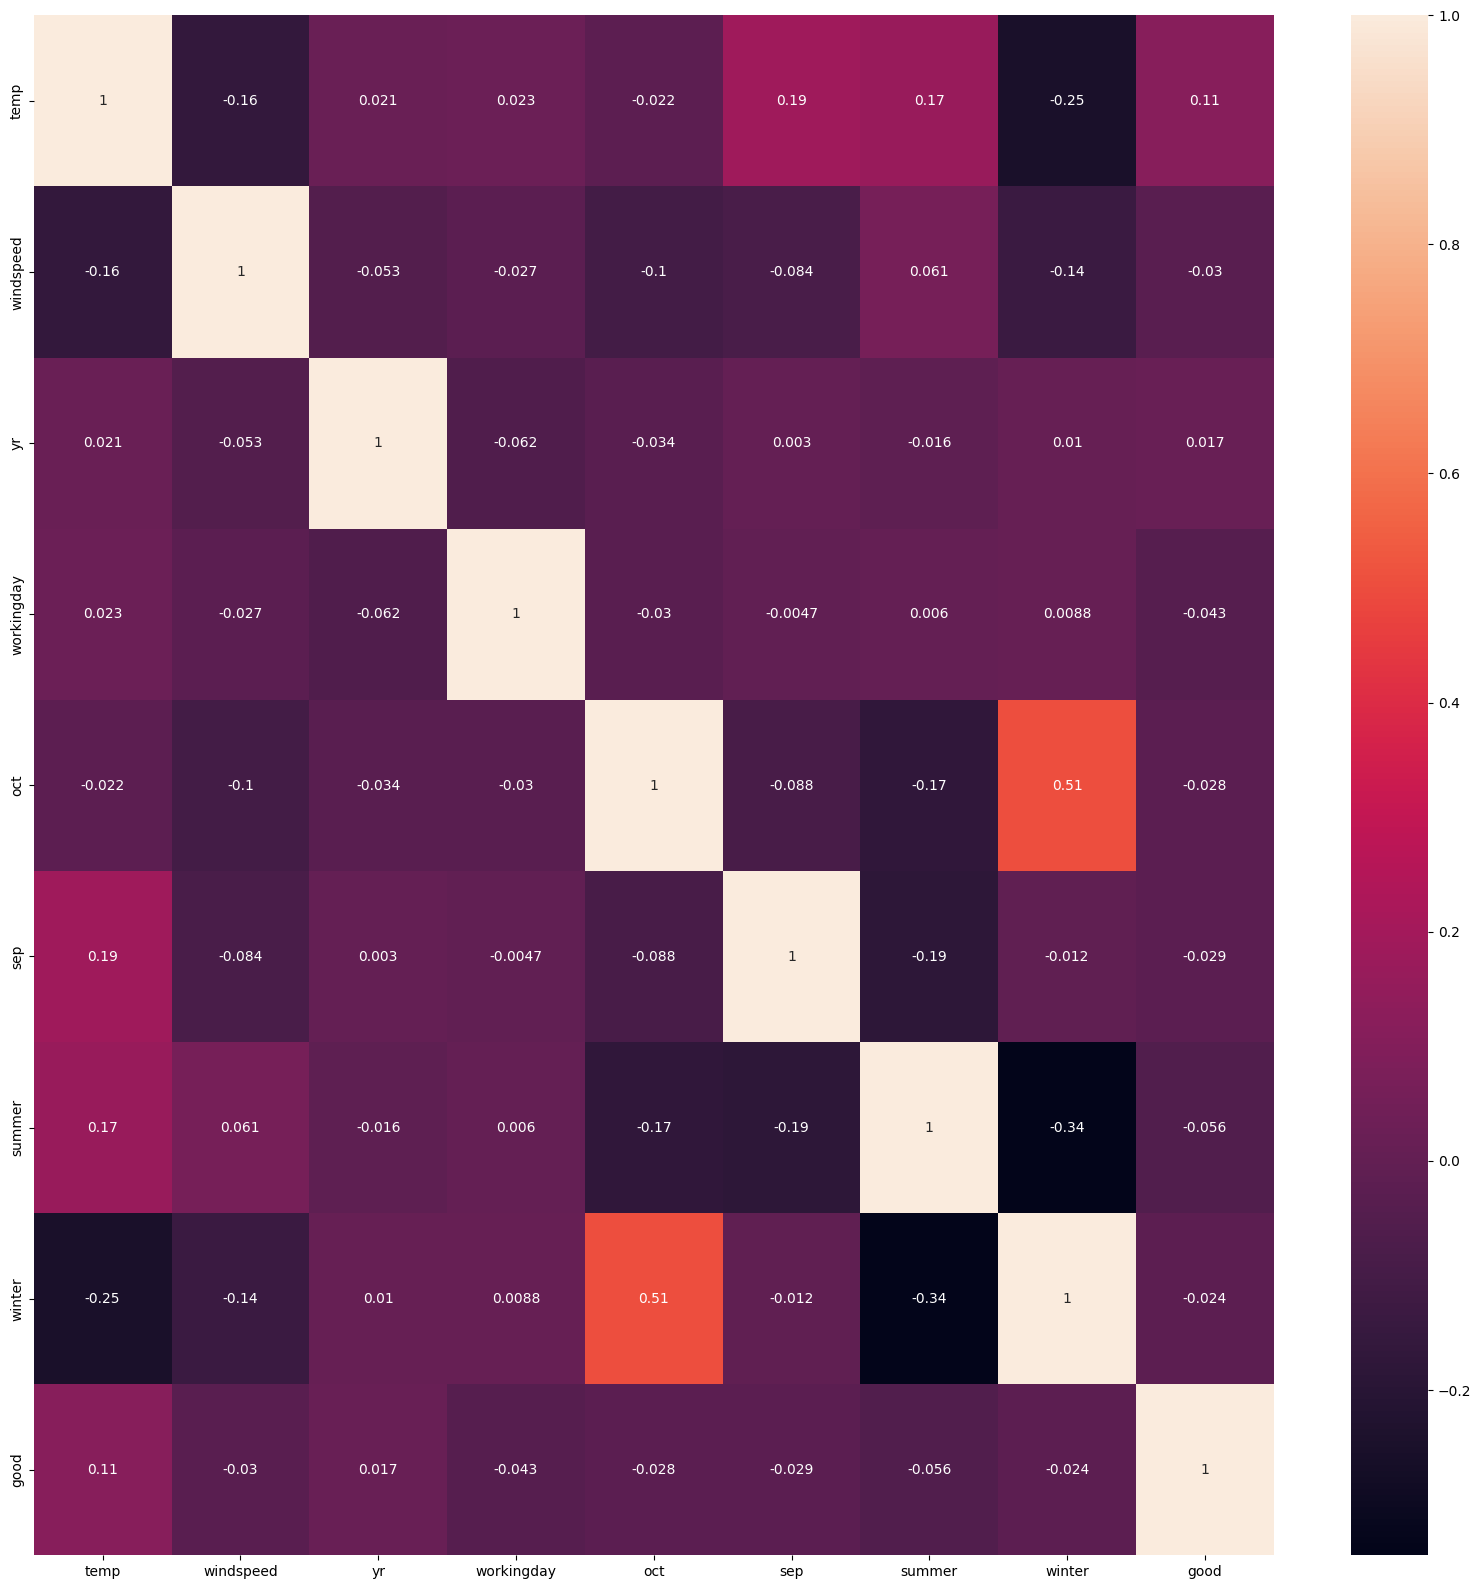

In [210]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[signi_list].corr(),annot=True);

In [211]:
# above list of variable are most significant of all
# We have remove the multicolinearity as all VIF is less than 5.

In [212]:
model  = build_lr_ols_model(signi_list)
model.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          9.70e-171
Time:                        17:10:08   Log-Likelihood:                -4173.6
No. Observations:                 511   AIC:                             8367.
Df Residuals:                     501   BIC:                             8410.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        431.0063    173.767      2.480      0.0

const          431.006311
temp          4500.658746
windspeed    -1363.276706
yr            2089.467983
workingday     222.757423
oct            347.161665
sep            878.393755
summer         799.784828
winter         945.930280
good           823.520655
dtype: float64

# Step 6: Residual Analysis of the train data and validation

# Test of normality

-0.7895174798582583


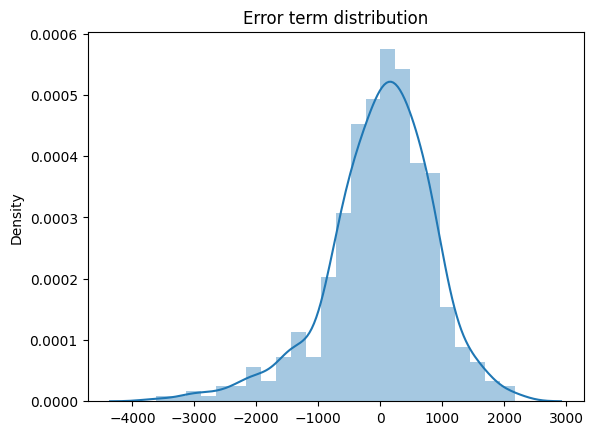

In [213]:
print(model.resid.skew())
sns.distplot(model.resid)
plt.title('Error term distribution')
plt.show()

In [214]:
# Error is almost normally distribution let try sqrt transformation and see

0.08859836627622426


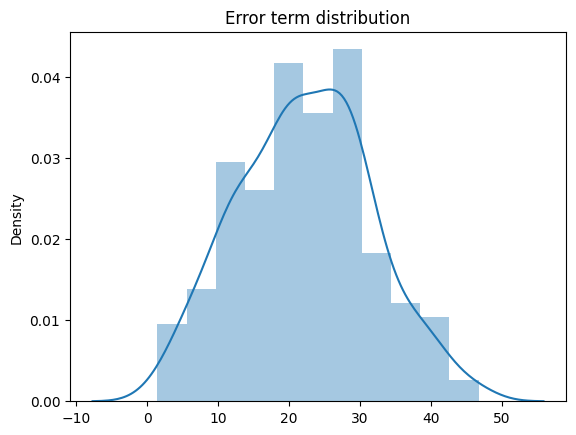

In [215]:
print(np.sqrt(model.resid).skew())
sns.distplot(np.sqrt(model.resid))
plt.title('Error term distribution')
plt.show()

# Linearity test

In [216]:
# We can see that varible are linearly dependent

In [217]:
X_train_sm = sm.add_constant(X_train[signi_list])

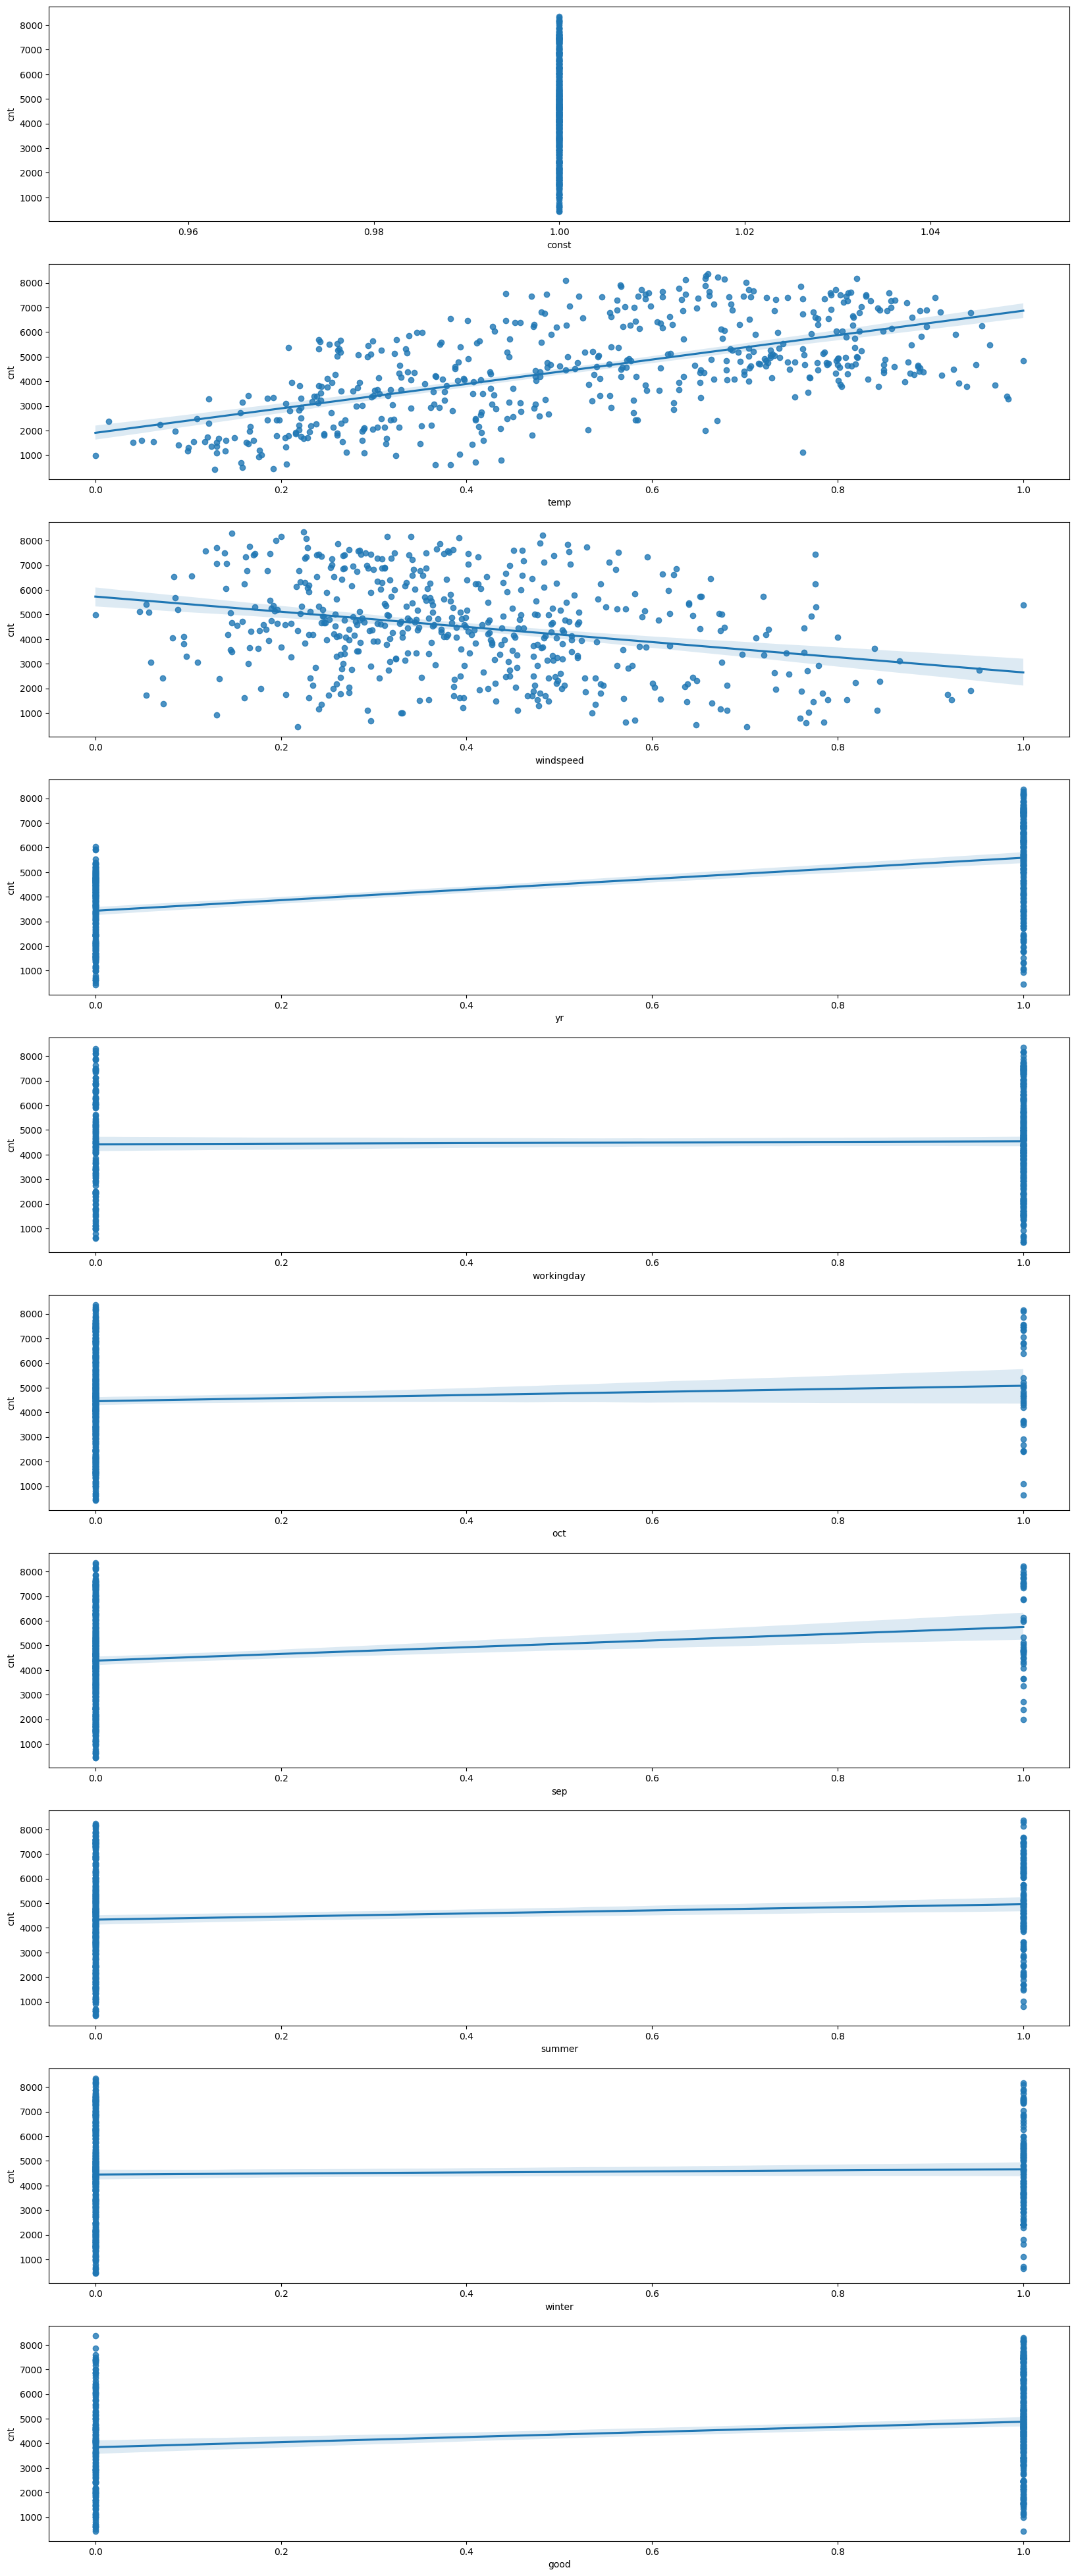

In [218]:
col1 = X_train_sm.columns
plt.figure(figsize=(20,50))
for i in range(col1.shape[0]):
    plt.subplot(col1.shape[0],1,i+1)
    sns.regplot(x = X_train_sm[col1[i]],y=y_train)
    plt.xlabel(col1[i])
plt.show()

# Homoscedasticity

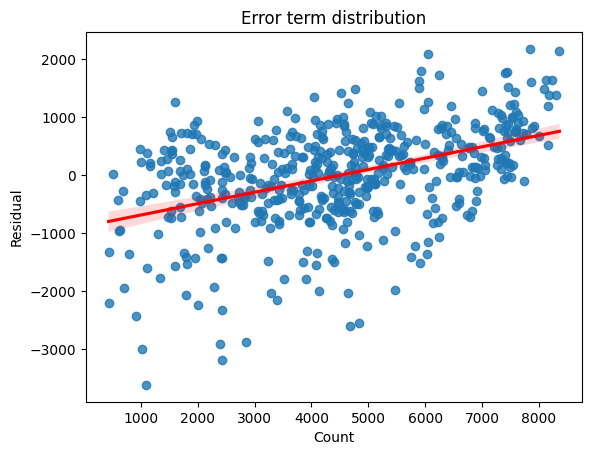

In [219]:
sns.regplot(x=y_train,y=model.resid,line_kws={'color':'red'})
plt.title('Error term distribution')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [220]:
# No visible pattern observed from above plot for residuals

In [221]:
# Durbin-Watson is 2.082 so there is no autocorrelation.

# Step 7: Making Predictions Using the Final Model

In [222]:
X_test_copy = X_test.copy()
X_test_copy[col] = scaler.transform(X_test_copy[col])
X_test_copy.head()

temp     atemp       hum  windspeed  yr  holiday  workingday  mon  \
283  0.614452  0.602726  0.831620   0.287831   0        0           1    0   
453  0.357420  0.372993  0.597258   0.275962   1        0           1    0   
266  0.666730  0.627409  0.886889   0.133577   0        0           0    0   
269  0.705938  0.641037  0.910454   0.228497   0        0           1    0   
120  0.464154  0.470806  0.783633   0.200305   0        0           0    0   

     sat  sun  ...  mar  may  nov  oct  sep  fall  summer  winter  good  \
283    0    0  ...    0    0    0    1    0     0       0       1     0   
453    0    0  ...    1    0    0    0    0     0       1       0     0   
266    1    0  ...    0    0    0    0    1     0       0       1     0   
269    0    0  ...    0    0    0    0    1     0       0       1     0   
120    0    1  ...    0    1    0    0    0     0       1       0     0   

     moderate  
283         1  
453         1  
266         1  
269         1  
120         1  

[5 rows x 29 columns]

In [223]:
X_test_signi = X_test_copy[signi_list]
X_test_signi.head(2)

temp  windspeed  yr  workingday  oct  sep  summer  winter  good
283  0.614452   0.287831   0           1    1    0       0       1     0
453  0.357420   0.275962   1           1    0    0       1       0     0

In [224]:
y_pred_train = model.predict(X_train_sm)

In [225]:
r2_score(y_train,y_pred_train)

0.8035236104434519

In [226]:
X_test_sm = sm.add_constant(X_test_signi)
y_pred_test = model.predict(X_test_sm)

In [227]:
r2_score(y_test,y_pred_test)

0.7951962038339953

# Step 8: Model Evaluation

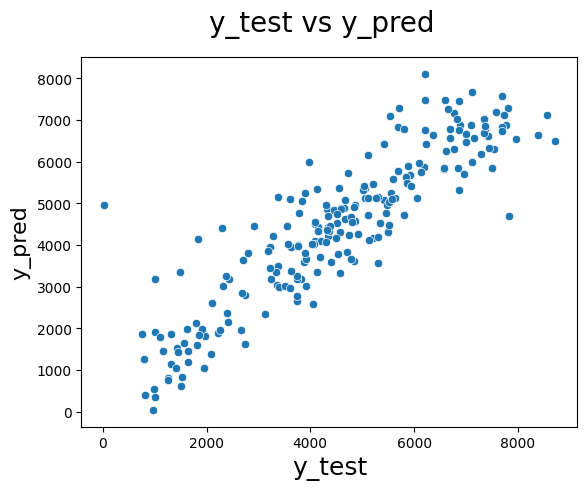

In [228]:
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [229]:
round(model.params,4)

const          431.0063
temp          4500.6587
windspeed    -1363.2767
yr            2089.4680
workingday     222.7574
oct            347.1617
sep            878.3938
summer         799.7848
winter         945.9303
good           823.5207
dtype: float64

In [230]:
# Adjuested r2
model.rsquared_adj

0.7999940944633941

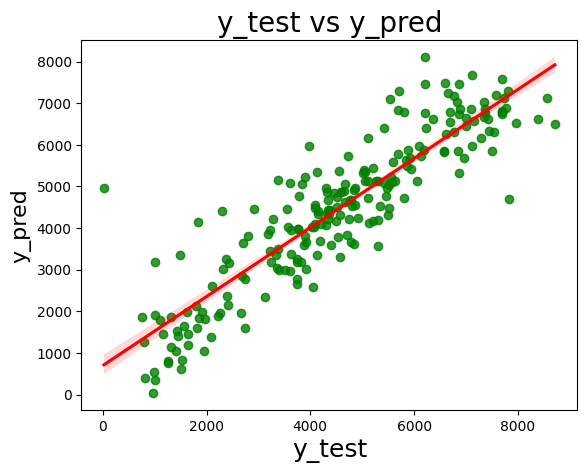

In [231]:
plt.figure()
sns.regplot(x=y_test, y=y_pred_test, ci=81, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Step 9: Conclusion

In [232]:
# We can see that r2 score for train and test are close together so we can say that our final model is good
# below variable are significant
print('Significant Variables are ',signi_list)

Significant Variables are  ['temp', 'windspeed', 'yr', 'workingday', 'oct', 'sep', 'summer', 'winter', 'good']
